# Garments ML Deployment 

In [1]:
# Importing all necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# ML training and tuning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix


# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Loading and saving models
import pickle

### Exploratory Data Analysis [EDA]

In [2]:
# Loading dataset
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
df.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [4]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

In [5]:
# Selecting categorical columns
df.describe(exclude = 'number')

date   quarter department        day
count        1197      1197       1197       1197
unique         59         5          3          6
top     1/31/2015  Quarter1     sweing  Wednesday
freq           24       360        691        208

In [6]:
# Note: used to select the columns with object data type
df.describe(include='O')

date   quarter department        day
count        1197      1197       1197       1197
unique         59         5          3          6
top     1/31/2015  Quarter1     sweing  Wednesday
freq           24       360        691        208

In [7]:
# Check types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
# Find the percentage of missing values
df.isna().sum()/df.shape[0]

date                     0.000000
quarter                  0.000000
department               0.000000
day                      0.000000
team                     0.000000
targeted_productivity    0.000000
smv                      0.000000
wip                      0.422723
over_time                0.000000
incentive                0.000000
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.000000
actual_productivity      0.000000
dtype: float64

In [9]:
# Find the percentage of missing values
round (df.isna().sum()/df.shape[0], 2)

date                     0.00
quarter                  0.00
department               0.00
day                      0.00
team                     0.00
targeted_productivity    0.00
smv                      0.00
wip                      0.42
over_time                0.00
incentive                0.00
idle_time                0.00
idle_men                 0.00
no_of_style_change       0.00
no_of_workers            0.00
actual_productivity      0.00
dtype: float64

## Feature Engineering

In [10]:
# Fill missing age values with average --> 30 it needs to be a whole number "no decimals"
df['wip'].fillna(round(df['wip'].mean()), inplace=True)

In [11]:
#drop unnecessary columns 
df =df.drop(columns=['date'],axis =1)

In [12]:
Q1 = df["actual_productivity"].quantile(0.25)
Q3 = df["actual_productivity"].quantile(0.75)
IQR = Q3-Q1
upbound = Q3 + 1.5*IQR
lowbound = Q1 - 1.5*IQR

outliers = df[df["actual_productivity"]<lowbound]
outliers

quarter  department        day  team  targeted_productivity    smv  \
60    Quarter1  finishing      Sunday    11                   0.75   4.15   
125   Quarter1  finishing   Wednesday     5                   0.70   4.15   
146   Quarter2      sweing   Thursday    11                   0.35  12.52   
147   Quarter2      sweing   Thursday     5                   0.70  42.41   
169   Quarter2  finishing    Saturday     5                   0.50   4.15   
215   Quarter2  finishing      Monday    10                   0.80   3.94   
237   Quarter2      sweing    Tuesday    10                   0.35  22.40   
255   Quarter2      sweing  Wednesday    11                   0.35  14.61   
256   Quarter2  finishing   Wednesday    10                   0.80   3.94   
257   Quarter2      sweing  Wednesday     2                   0.80  51.02   
258   Quarter2  finishing   Wednesday     2                   0.80   3.94   
298   Quarter3  finishing    Saturday    11                   0.80   4.15   
317   Quarter3  finishing      Sunday    10                   0.70   3.94   
336   Quarter3      sweing     Monday    12                   0.35  15.26   
392   Quarter4  finishing    Thursday    12                   0.60   4.08   
414   Quarter4      sweing   Saturday     8                   0.35  15.09   
415   Quarter4  finishing    Saturday     9                   0.60   3.94   
436   Quarter4  finishing      Sunday     8                   0.80   2.90   
455   Quarter4      sweing     Monday    11                   0.35  28.08   
496   Quarter4      sweing  Wednesday     7                   0.60  23.54   
497   Quarter4  finishing   Wednesday    11                   0.50   2.90   
541   Quarter5      sweing   Saturday     8                   0.50  23.54   
560   Quarter1  finishing      Sunday     6                   0.60   2.90   
577   Quarter1      sweing     Monday     7                   0.70  24.26   
578   Quarter1  finishing      Monday     6                   0.60   2.90   
579   Quarter1      sweing     Monday     8                   0.65  24.26   
689   Quarter2      sweing     Monday     7                   0.35  30.10   
690   Quarter2      sweing     Monday     8                   0.35  30.10   
691   Quarter2   finishing     Monday    12                   0.80   4.08   
748   Quarter2      sweing   Thursday     3                   0.35  30.10   
765   Quarter2   finishing   Saturday     9                   0.80   3.94   
783   Quarter3   finishing     Sunday     4                   0.75   4.15   
784   Quarter3      sweing     Sunday     9                   0.50  18.79   
801   Quarter3      sweing     Monday     9                   0.60  18.79   
802   Quarter3   finishing     Monday     7                   0.70   4.15   
822   Quarter3      sweing    Tuesday    10                   0.65  18.22   
840   Quarter3      sweing  Wednesday     2                   0.60  30.33   
841   Quarter3      sweing  Wednesday    10                   0.70  19.68   
842   Quarter3   finishing  Wednesday     3                   0.50   5.13   
843   Quarter3      sweing  Wednesday     8                   0.65  29.40   
863   Quarter3      sweing   Thursday    10                   0.70  19.68   
882   Quarter4      sweing     Sunday     5                   0.80  30.10   
883   Quarter4   finishing     Sunday     7                   0.70   5.13   
920   Quarter4   finishing    Tuesday     2                   0.70   3.90   
921   Quarter4      sweing    Tuesday     1                   0.60  22.53   
963   Quarter4   finishing   Thursday     6                   0.75   2.90   
984   Quarter4   finishing   Saturday     6                   0.75   2.90   
1024  Quarter1   finishing     Monday     7                   0.80   4.60   
1045  Quarter1   finishing    Tuesday     6                   0.75   2.90   
1046  Quarter1      sweing    Tuesday     2                   0.40  15.28   
1067  Quarter1      sweing  Wednesday     6                   0.75  18.79   
108

<AxesSubplot:ylabel='actual_productivity'>

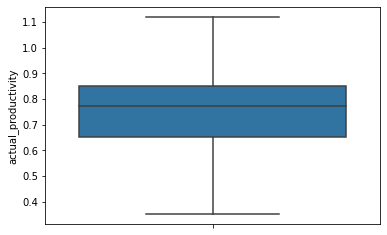

In [13]:
#after deleting the outliers
df.loc[(df["actual_productivity"]<lowbound),"actual_productivity"] = lowbound
sns.boxplot(data=df,y='actual_productivity')

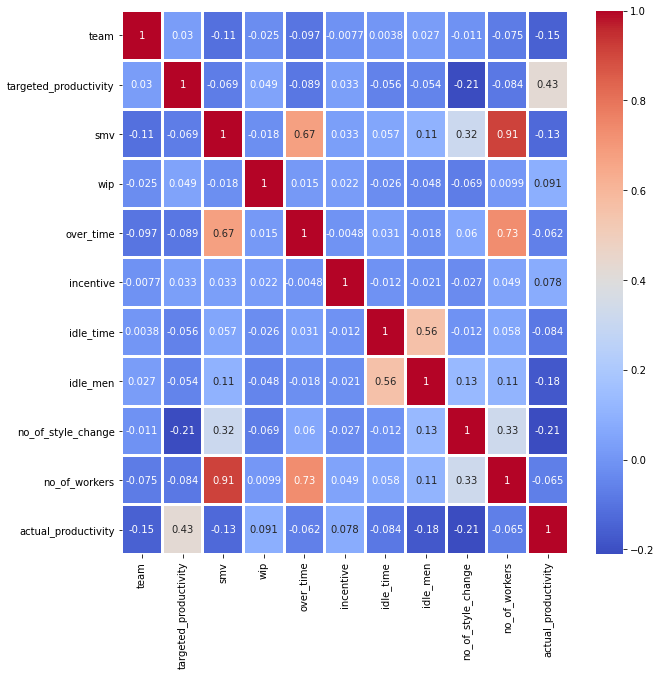

In [14]:
# Finding the corelation between variables 
# target is -->actual_productivity

plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)

array([[<AxesSubplot:title={'center':'team'}>,
        <AxesSubplot:title={'center':'targeted_productivity'}>,
        <AxesSubplot:title={'center':'smv'}>],
       [<AxesSubplot:title={'center':'wip'}>,
        <AxesSubplot:title={'center':'over_time'}>,
        <AxesSubplot:title={'center':'incentive'}>],
       [<AxesSubplot:title={'center':'idle_time'}>,
        <AxesSubplot:title={'center':'idle_men'}>,
        <AxesSubplot:title={'center':'no_of_style_change'}>],
       [<AxesSubplot:title={'center':'no_of_workers'}>,
        <AxesSubplot:title={'center':'actual_productivity'}>,
        <AxesSubplot:>]], dtype=object)

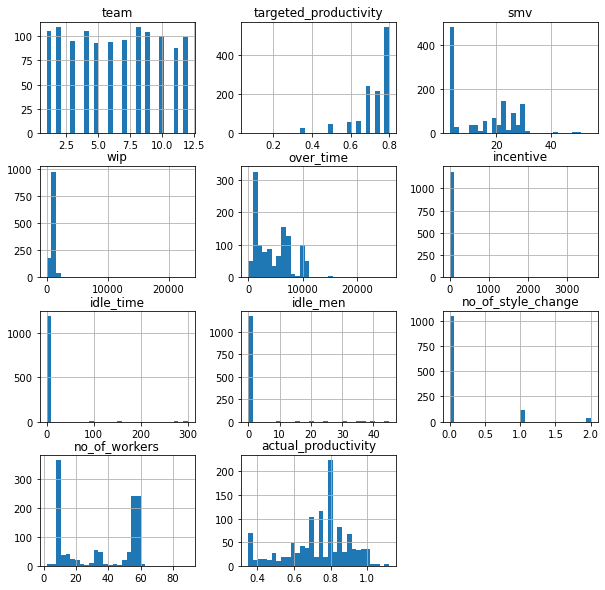

In [15]:
df.hist(bins=30, figsize=(10, 10))


In [16]:
data = pd.concat([df['actual_productivity'], df['team']], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x='team', y="actual_productivity", data=data)

In [17]:
df['department'] = df['department'].replace(['finishing '],'finishing')
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

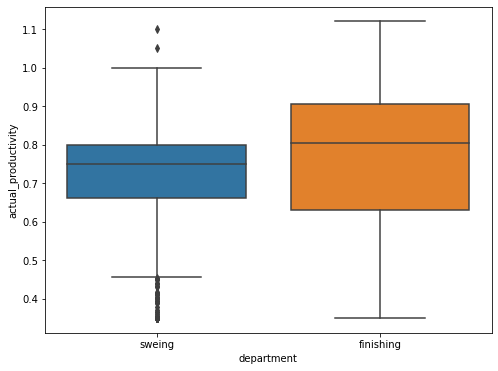

In [18]:
data = pd.concat([df['actual_productivity'], df['department']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='department', y="actual_productivity", data=data)

In [19]:
df

quarter department        day  team  targeted_productivity    smv  \
0     Quarter1     sweing   Thursday     8                   0.80  26.16   
1     Quarter1  finishing   Thursday     1                   0.75   3.94   
2     Quarter1     sweing   Thursday    11                   0.80  11.41   
3     Quarter1     sweing   Thursday    12                   0.80  11.41   
4     Quarter1     sweing   Thursday     6                   0.80  25.90   
...        ...        ...        ...   ...                    ...    ...   
1192  Quarter2  finishing  Wednesday    10                   0.75   2.90   
1193  Quarter2  finishing  Wednesday     8                   0.70   3.90   
1194  Quarter2  finishing  Wednesday     7                   0.65   3.90   
1195  Quarter2  finishing  Wednesday     9                   0.75   2.90   
1196  Quarter2  finishing  Wednesday     6                   0.70   2.90   

         wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0     1108.0       7080         98        0.0         0                   0   
1     1190.0        960          0        0.0         0                   0   
2      968.0       3660         50        0.0         0                   0   
3      968.0       3660         50        0.0         0                   0   
4     1170.0       1920         50        0.0         0                   0   
...      ...        ...        ...        ...       ...                 ...   
1192  1190.0        960          0        0.0         0                   0   
1193  1190.0        960          0        0.0         0                   0   
1194  1190.0        960          0        0.0         0                   0   
1195  1190.0       1800          0        0.0         0                   0   
1196  1190.0        720          0        0.0         0                   0   

      no_of_workers  actual_productivity  
0              59.0             0.940725  
1               8.0             0.886500  
2              30.5             0.800570  
3              30.5             0.800570  
4              56.0             0.800382  
...             ...                  ...  
1192            8.0             0.628333  
1193            8.0             0.625625  
1194            8.0             0.625625  
1195           15.0             0.505889  
1196            6.0             0.394722  

[1197 rows x 14 columns]

### Building Machine Learning Model 

### Linear Regression 

In [22]:
# Split dataset to features and target
# Note: Our target in this model is gender
var =  ['quarter','team','targeted_productivity','over_time','no_of_workers']

X = df[var]
y = df['department']

In [23]:
X

quarter  team  targeted_productivity  over_time  no_of_workers
0     Quarter1     8                   0.80       7080           59.0
1     Quarter1     1                   0.75        960            8.0
2     Quarter1    11                   0.80       3660           30.5
3     Quarter1    12                   0.80       3660           30.5
4     Quarter1     6                   0.80       1920           56.0
...        ...   ...                    ...        ...            ...
1192  Quarter2    10                   0.75        960            8.0
1193  Quarter2     8                   0.70        960            8.0
1194  Quarter2     7                   0.65        960            8.0
1195  Quarter2     9                   0.75       1800           15.0
1196  Quarter2     6                   0.70        720            6.0

[1197 rows x 5 columns]

In [24]:
X.head()

quarter  team  targeted_productivity  over_time  no_of_workers
0  Quarter1     8                   0.80       7080           59.0
1  Quarter1     1                   0.75        960            8.0
2  Quarter1    11                   0.80       3660           30.5
3  Quarter1    12                   0.80       3660           30.5
4  Quarter1     6                   0.80       1920           56.0

In [25]:
# Splitting the dataset to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 42)

In [26]:
X_train.shape, X_test.shape

((897, 5), (300, 5))

In [30]:
# Encoding categorical features

enc = OneHotEncoder()

X_train_enc = enc.fit_transform(X_train[['quarter']])

X_test_enc = enc.transform(X_test[['quarter']])

In [31]:
enc.categories_[0]

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [32]:
print(X_train_enc.toarray())

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [33]:
enc.get_feature_names()

array(['x0_Quarter1', 'x0_Quarter2', 'x0_Quarter3', 'x0_Quarter4',
       'x0_Quarter5'], dtype=object)

In [34]:
# add back encoded columns to dataframe
X_train[enc.get_feature_names()] = X_train_enc.toarray()
X_test[enc.get_feature_names()] = X_test_enc.toarray()

<ipython-input-34-3adce797b924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[enc.get_feature_names()] = X_train_enc.toarray()
C:\Users\esooo\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-34-3adce797b924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [35]:
X_train.drop(columns=['quarter'], inplace=True)
X_test.drop(columns=['quarter'], inplace=True)

C:\Users\esooo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
X_train.head()

team  targeted_productivity  over_time  no_of_workers  x0_Quarter1  \
1183    10                   0.75       6000           50.0          0.0   
227      6                   0.80       5670           31.5          0.0   
692     12                   0.80       1080            9.0          0.0   
522      4                   0.80       1200           10.0          0.0   
788      3                   0.50        960            8.0          0.0   

      x0_Quarter2  x0_Quarter3  x0_Quarter4  x0_Quarter5  
1183          1.0          0.0          0.0          0.0  
227           1.0          0.0          0.0          0.0  
692           1.0          0.0          0.0          0.0  
522           0.0          0.0          0.0          1.0  
788           0.0          1.0          0.0          0.0

In [37]:
y_test.head()

921       sweing
321       sweing
101    finishing
920    finishing
58     finishing
Name: department, dtype: object

In [38]:
# Building a logistic regression model 
lr = LogisticRegression(max_iter=500)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [39]:
prediction = lr.predict(X_test)

In [40]:
lr.score(X_test, y_test)

1.0

In [41]:
# Evaluating the model

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

   finishing       1.00      1.00      1.00       113
      sweing       1.00      1.00      1.00       187

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



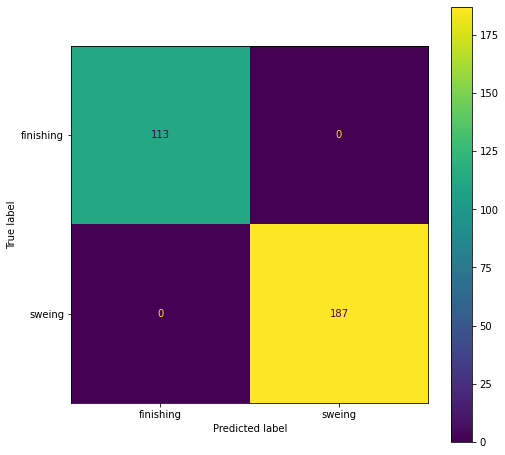

In [42]:
# Evaluating the model

cm = confusion_matrix(y_test, prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['finishing', 'sweing'])
plt.rcParams['figure.figsize'] = [8, 8]
cmd.plot()
plt.show()

### Decision Tree Classifier

In [43]:
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [44]:
class_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
class_tree.fit(X_train_sc, y_train)
preds_class = class_tree.predict(X_test_sc)

In [45]:
val_train = round(class_tree.score(X_train_sc, y_train),2)*100
val_test = round(class_tree.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 100.0%
Test Set Accuracy: 100.0%


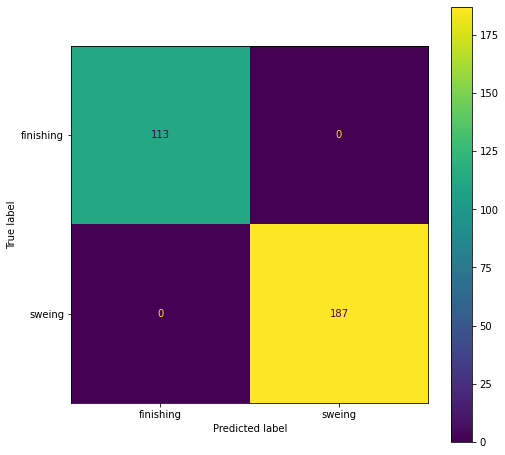

In [46]:
plot_confusion_matrix(class_tree, X_test_sc, y_test);

### Improving ML Model Using Grid Search

In [47]:
# retrain using greed search

param_grid = {'C': np.arange(1e-05, 3),
             'solver': ['lbfgs', 'liblinear']}

# scoring = {'Accuracy': 'accuracy', 'recall': 'recall', 'precision': 'precision'}
gs = GridSearchCV(LogisticRegression(max_iter=100), return_train_score=True,
                  param_grid=param_grid, cv=10, refit='Accuracy')

In [48]:
gs.fit(X_train, y_train)
results = gs.cv_results_

C:\Users\esooo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\esooo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\esooo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\esooo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [49]:
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)

best params: LogisticRegression(C=1.00001)
best params: {'C': 1.00001, 'solver': 'lbfgs'}
best score: 0.9966666666666667


In [50]:
y_pred=gs.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   finishing       0.98      1.00      0.99       113
      sweing       1.00      0.99      0.99       187

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



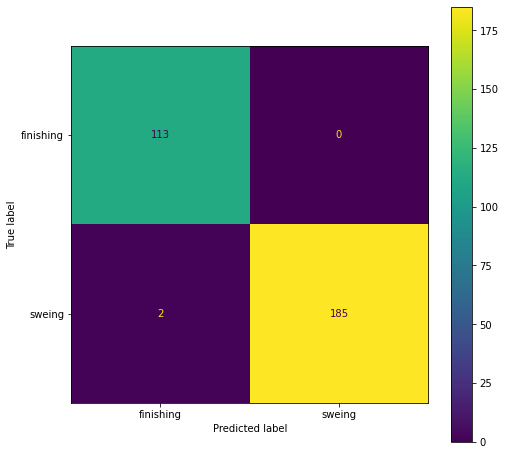

In [52]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['finishing', 'sweing'])
plt.rcParams['figure.figsize'] = [8, 8]
cmd.plot()
plt.show()

# Save ML Model and Encoder

In [53]:
# Note it is important to save both the model and the encoder... why the encoder?

pickle.dump(enc, open('../encoder.pkl', 'wb'))
pickle.dump(gs, open('../model.pkl','wb'))

In [54]:
# Load just to check that model and encoder is working
encoder = pickle.load(open('../encoder.pkl', 'rb'))
model = pickle.load(open('../model.pkl', 'rb'))

In [55]:
y_preds = model.predict(X_test)

In [56]:
ss = pd.Series(y_preds, name='department')

In [57]:
# plot true vs predicted values
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Actual vs Predicted Values')

# First Chart
ax1.set_title('True vales')
ax1.pie(y_test.value_counts(), labels=['finishing', 'sweing'], autopct='%1.1f%%', shadow=True)

# Second Chart
ax2.pie(ss.value_counts(), labels=['finishing', 'sweing'], autopct='%1.1f%%', shadow=True)
ax2.set_title('Predicted vales')
plt.show()